In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from cmc import coinmarketcap
from adjustText import adjust_text
import matplotlib.ticker as mtick
from matplotlib.font_manager import FontProperties
import matplotlib.patheffects as pe
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.lines

%matplotlib inline

In [2]:
limit = 15
coin_market_cap_api = 'https://api.coinmarketcap.com/v1/ticker/?limit={}'.format(limit)
 
now = pd.datetime.now()
market_data = pd.read_json(coin_market_cap_api)
market_data.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,4.907305e+09,17478325,bitcoin,1547324963,64134398273,2.100000e+07,Bitcoin,-0.03,-0.98,-4.99,1.000000,3669.367532,1,BTC,17478325
1,3.991907e+08,41040405095,ripple,1547324944,13546936171,1.000000e+11,XRP,-0.06,-1.83,-7.71,0.000090,0.330088,2,XRP,99991724864
2,2.222088e+09,104337918,ethereum,1547324957,13202617535,NaN,Ethereum,-0.14,-0.92,-19.37,0.034577,126.537100,3,ETH,104337918
3,2.103967e+08,17562788,bitcoin-cash,1547324953,2372353672,2.100000e+07,Bitcoin Cash,0.19,1.97,-16.77,0.036910,135.078425,4,BCH,17562788
4,7.030941e+08,906245118,eos,1547324952,2209092621,NaN,EOS,-0.08,0.07,-10.60,0.000666,2.437633,5,EOS,1006245120


In [3]:
market_data1 = market_data[['id','symbol','market_cap_usd']]
market_data1.set_index('id', inplace=True)
crypto1 = market_data1.sort_values(by='market_cap_usd', ascending=False)

In [4]:
crypto1

,symbol,market_cap_usd
id,,
bitcoin,BTC,64134398273
ripple,XRP,13546936171
ethereum,ETH,13202617535
bitcoin-cash,BCH,2372353672
eos,EOS,2209092621
stellar,XLM,2037522067
tether,USDT,1965782215
litecoin,LTC,1933569956
tron,TRX,1559344120


In [5]:
symbols = crypto1.symbol.tolist()
symbols1 = crypto1.index.tolist()

In [6]:
symbols1.remove('tether')

In [7]:
start = datetime.datetime.now() - datetime.timedelta(days=365) # 1 Year ago
end = datetime.datetime.now()

df_list = []
 
#not all stocks will return data so set up an empty list to store the stock tickers that actually successfully returns data
used_stocks = []
 
#iterate over stock tickers in list and download relevant data, storing said data and successfully downloaded tickers along the way
for coin in symbols1:
    dat = coinmarketcap.getDataFor(coin, start, end, fields = ['Close'])
    dat.columns = [coin]
    df_list.append(dat)
    used_stocks.append(coin)

100%|████████████████████████████████████████████| 1/1 [00:00<00:00,  1.17it/s]


In [8]:
df1 = pd.concat(df_list,axis=1)
df1.head()

,bitcoin,ripple,ethereum,bitcoin-cash,eos,stellar,litecoin,tron,bitcoin-sv,cardano,iota,binance-coin,monero,dash
Date,,,,,,,,,,,,,,
2018-01-12,13980.6,2.04,1273.20,2620.99,13.75,0.677960,236.86,0.108858,NaN,0.897508,3.69,22.32,394.78,1054.87
2018-01-13,14360.2,2.02,1396.42,2685.29,16.23,0.671564,259.19,0.103035,NaN,0.884124,3.94,22.17,420.05,1100.26
2018-01-14,13772.0,1.86,1366.77,2553.32,13.44,0.630856,238.68,0.084782,NaN,0.802262,3.74,20.78,399.52,1014.07
2018-01-15,13819.8,1.68,1291.92,2401.54,12.94,0.599271,232.77,0.075694,NaN,0.778587,3.48,19.56,414.57,939.19
2018-01-16,11490.5,1.18,1053.69,1772.07,10.28,0.441197,188.33,0.054488,NaN,0.626493,2.60,13.89,320.04,759.61


In [9]:
# calculate daily return
crypto_returns = np.log(df1/df1.shift(1))
# calculate Yearly volatility
crypto_volatility  = round(crypto_returns.rolling(230).std() * np.sqrt(365)*100)
crypto_volatility.tail()

,bitcoin,ripple,ethereum,bitcoin-cash,eos,stellar,litecoin,tron,bitcoin-sv,cardano,iota,binance-coin,monero,dash
Date,,,,,,,,,,,,,,
2019-01-07,65.0,107.0,100.0,137.0,118.0,102.0,89.0,111.0,NaN,109.0,128.0,93.0,103.0,108.0
2019-01-08,65.0,107.0,99.0,136.0,117.0,102.0,89.0,112.0,NaN,108.0,128.0,92.0,103.0,108.0
2019-01-09,65.0,107.0,99.0,136.0,115.0,102.0,89.0,112.0,NaN,109.0,128.0,92.0,103.0,108.0
2019-01-10,65.0,108.0,101.0,137.0,117.0,103.0,91.0,113.0,NaN,110.0,129.0,93.0,104.0,110.0
2019-01-11,65.0,108.0,101.0,137.0,117.0,103.0,91.0,113.0,NaN,110.0,129.0,93.0,104.0,109.0


In [10]:
# checking for NA cells percentage at 'bitcoin-sv'
df1['bitcoin-sv'].isnull().sum()/len(df1['bitcoin-sv'])

0.8246575342465754

In [11]:
# because majority of cells are not a number, drop all the column
df1.dropna(axis=1, inplace=True)

In [12]:
crypto1.drop(['bitcoin-sv','tether'], inplace=True)

In [13]:
# creating a volatility dictionary for all cryptos
crypto_vol_dict = dict()

for i in df1.columns:
    crypto_vol_dict[i] = crypto_volatility[i][-1]

In [14]:
crypto_vol_dict

{'binance-coin': 93.0,
 'bitcoin': 65.0,
 'bitcoin-cash': 137.0,
 'cardano': 110.0,
 'dash': 109.0,
 'eos': 117.0,
 'ethereum': 101.0,
 'iota': 129.0,
 'litecoin': 91.0,
 'monero': 104.0,
 'ripple': 108.0,
 'stellar': 103.0,
 'tron': 113.0}

In [15]:
# creating year to date dictionary for returns
ytd_dict = dict()

# getting the location for the end of last year
a = datetime.datetime.now() - datetime.timedelta(days=365)
b = datetime.datetime(a.year,12,31)
loc_end_last_year = df1.index.get_loc(b)

for i in df1.columns:
    ytd_dict[i] = ((df1[i][-1]/(df1[i][loc_end_last_year])-1)*100).round(2)

In [16]:
ytd_dict

{'binance-coin': -1.3,
 'bitcoin': -1.48,
 'bitcoin-cash': -12.83,
 'cardano': 7.51,
 'dash': -6.68,
 'eos': -5.84,
 'ethereum': -4.36,
 'iota': -11.55,
 'litecoin': 6.1,
 'monero': -0.93,
 'ripple': -5.61,
 'stellar': -4.86,
 'tron': 33.47}

In [17]:
min(ytd_dict.values())

-12.83

In [18]:
# creating a drawdown dictionary (year to date)
drawdown_ytd_dict = dict()

for i in df1.columns:
    drawdown_ytd_dict[i] = ((df1[i][-1]/max(df1[i].iloc[loc_end_last_year:])-1)*100).round(2)

In [19]:
drawdown_ytd_dict

{'binance-coin': -8.43,
 'bitcoin': -9.55,
 'bitcoin-cash': -23.37,
 'cardano': -15.38,
 'dash': -14.05,
 'eos': -16.84,
 'ethereum': -19.14,
 'iota': -20.1,
 'litecoin': -18.11,
 'monero': -16.55,
 'ripple': -11.28,
 'stellar': -13.28,
 'tron': -11.58}

In [20]:
z= pd.DataFrame([ytd_dict, drawdown_ytd_dict, crypto_vol_dict]).T
df_test = pd.concat([crypto1,z], axis=1, sort=True)
df_test

,symbol,market_cap_usd,0,1,2
binance-coin,BNB,779144220,-1.30,-8.43,93.0
bitcoin,BTC,64134398273,-1.48,-9.55,65.0
bitcoin-cash,BCH,2372353672,-12.83,-23.37,137.0
cardano,ADA,1133434777,7.51,-15.38,110.0
dash,DASH,630197120,-6.68,-14.05,109.0
eos,EOS,2209092621,-5.84,-16.84,117.0
ethereum,ETH,13202617535,-4.36,-19.14,101.0
iota,MIOTA,868673939,-11.55,-20.10,129.0
litecoin,LTC,1933569956,6.10,-18.11,91.0
monero,XMR,756577061,-0.93,-16.55,104.0


In [21]:
df_test.columns = ['Symbol','MarketCap','YTD','DrawdownYTD','Volatility']

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, binance-coin to tron
Data columns (total 5 columns):
Symbol         13 non-null object
MarketCap      13 non-null int64
YTD            13 non-null float64
DrawdownYTD    13 non-null float64
Volatility     13 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 624.0+ bytes


In [23]:
df_test.reset_index(inplace=True)

In [24]:
df_test.columns = ['Id','Symbol','MarketCap','YTD','DrawdownYTD','Volatility']
df_test

,Id,Symbol,MarketCap,YTD,DrawdownYTD,Volatility
0,binance-coin,BNB,779144220,-1.30,-8.43,93.0
1,bitcoin,BTC,64134398273,-1.48,-9.55,65.0
2,bitcoin-cash,BCH,2372353672,-12.83,-23.37,137.0
3,cardano,ADA,1133434777,7.51,-15.38,110.0
4,dash,DASH,630197120,-6.68,-14.05,109.0
5,eos,EOS,2209092621,-5.84,-16.84,117.0
6,ethereum,ETH,13202617535,-4.36,-19.14,101.0
7,iota,MIOTA,868673939,-11.55,-20.10,129.0
8,litecoin,LTC,1933569956,6.10,-18.11,91.0
9,monero,XMR,756577061,-0.93,-16.55,104.0


In [25]:
df_test = df_test[df_test.Id!='tether']
df_test

,Id,Symbol,MarketCap,YTD,DrawdownYTD,Volatility
0,binance-coin,BNB,779144220,-1.30,-8.43,93.0
1,bitcoin,BTC,64134398273,-1.48,-9.55,65.0
2,bitcoin-cash,BCH,2372353672,-12.83,-23.37,137.0
3,cardano,ADA,1133434777,7.51,-15.38,110.0
4,dash,DASH,630197120,-6.68,-14.05,109.0
5,eos,EOS,2209092621,-5.84,-16.84,117.0
6,ethereum,ETH,13202617535,-4.36,-19.14,101.0
7,iota,MIOTA,868673939,-11.55,-20.10,129.0
8,litecoin,LTC,1933569956,6.10,-18.11,91.0
9,monero,XMR,756577061,-0.93,-16.55,104.0


In [26]:
df_test.reset_index(inplace=True)
df_test.index= df_test.index+1
df_test.drop('index', axis=1, inplace=True)
df_test

,Id,Symbol,MarketCap,YTD,DrawdownYTD,Volatility
1,binance-coin,BNB,779144220,-1.30,-8.43,93.0
2,bitcoin,BTC,64134398273,-1.48,-9.55,65.0
3,bitcoin-cash,BCH,2372353672,-12.83,-23.37,137.0
4,cardano,ADA,1133434777,7.51,-15.38,110.0
5,dash,DASH,630197120,-6.68,-14.05,109.0
6,eos,EOS,2209092621,-5.84,-16.84,117.0
7,ethereum,ETH,13202617535,-4.36,-19.14,101.0
8,iota,MIOTA,868673939,-11.55,-20.10,129.0
9,litecoin,LTC,1933569956,6.10,-18.11,91.0
10,monero,XMR,756577061,-0.93,-16.55,104.0


In [27]:
df_test.Id = df_test.Id.str.title()
df_test

,Id,Symbol,MarketCap,YTD,DrawdownYTD,Volatility
1,Binance-Coin,BNB,779144220,-1.30,-8.43,93.0
2,Bitcoin,BTC,64134398273,-1.48,-9.55,65.0
3,Bitcoin-Cash,BCH,2372353672,-12.83,-23.37,137.0
4,Cardano,ADA,1133434777,7.51,-15.38,110.0
5,Dash,DASH,630197120,-6.68,-14.05,109.0
6,Eos,EOS,2209092621,-5.84,-16.84,117.0
7,Ethereum,ETH,13202617535,-4.36,-19.14,101.0
8,Iota,MIOTA,868673939,-11.55,-20.10,129.0
9,Litecoin,LTC,1933569956,6.10,-18.11,91.0
10,Monero,XMR,756577061,-0.93,-16.55,104.0


In [28]:
for index, row in df_test.iterrows():
    print(row[0])

Binance-Coin
Bitcoin
Bitcoin-Cash
Cardano
Dash
Eos
Ethereum
Iota
Litecoin
Monero
Ripple
Stellar
Tron


In [29]:
df_test.sort_values(by='MarketCap', ascending=False)

,Id,Symbol,MarketCap,YTD,DrawdownYTD,Volatility
2,Bitcoin,BTC,64134398273,-1.48,-9.55,65.0
11,Ripple,XRP,13546936171,-5.61,-11.28,108.0
7,Ethereum,ETH,13202617535,-4.36,-19.14,101.0
3,Bitcoin-Cash,BCH,2372353672,-12.83,-23.37,137.0
6,Eos,EOS,2209092621,-5.84,-16.84,117.0
12,Stellar,XLM,2037522067,-4.86,-13.28,103.0
9,Litecoin,LTC,1933569956,6.10,-18.11,91.0
13,Tron,TRX,1559344120,33.47,-11.58,113.0
4,Cardano,ADA,1133434777,7.51,-15.38,110.0
8,Iota,MIOTA,868673939,-11.55,-20.10,129.0


In [30]:
crypto_sorted = df_test.sort_values(by='MarketCap', ascending=False)
crypto_sorted

,Id,Symbol,MarketCap,YTD,DrawdownYTD,Volatility
2,Bitcoin,BTC,64134398273,-1.48,-9.55,65.0
11,Ripple,XRP,13546936171,-5.61,-11.28,108.0
7,Ethereum,ETH,13202617535,-4.36,-19.14,101.0
3,Bitcoin-Cash,BCH,2372353672,-12.83,-23.37,137.0
6,Eos,EOS,2209092621,-5.84,-16.84,117.0
12,Stellar,XLM,2037522067,-4.86,-13.28,103.0
9,Litecoin,LTC,1933569956,6.10,-18.11,91.0
13,Tron,TRX,1559344120,33.47,-11.58,113.0
4,Cardano,ADA,1133434777,7.51,-15.38,110.0
8,Iota,MIOTA,868673939,-11.55,-20.10,129.0


In [31]:
crypto_sorted['MC_categoris'] = 0
crypto_sorted.iloc[:1,6] = 70
crypto_sorted.iloc[1:3,6] = 50
crypto_sorted.iloc[3:8,6] = 40
crypto_sorted.iloc[8:,6] = 30

In [32]:
crypto_sorted

,Id,Symbol,MarketCap,YTD,DrawdownYTD,Volatility,MC_categoris
2,Bitcoin,BTC,64134398273,-1.48,-9.55,65.0,70
11,Ripple,XRP,13546936171,-5.61,-11.28,108.0,50
7,Ethereum,ETH,13202617535,-4.36,-19.14,101.0,50
3,Bitcoin-Cash,BCH,2372353672,-12.83,-23.37,137.0,40
6,Eos,EOS,2209092621,-5.84,-16.84,117.0,40
12,Stellar,XLM,2037522067,-4.86,-13.28,103.0,40
9,Litecoin,LTC,1933569956,6.10,-18.11,91.0,40
13,Tron,TRX,1559344120,33.47,-11.58,113.0,40
4,Cardano,ADA,1133434777,7.51,-15.38,110.0,30
8,Iota,MIOTA,868673939,-11.55,-20.10,129.0,30


In [33]:
crypto_sorted['color'] = 0
crypto_sorted.iloc[0,7] = 'goldenrod'
crypto_sorted.iloc[1,7] = 'grey'
crypto_sorted.iloc[2,7] = 'black'
crypto_sorted.iloc[3,7] = 'yellow'
crypto_sorted.iloc[4,7] = 'silver'
crypto_sorted.iloc[5,7] = 'cornflowerblue'
crypto_sorted.iloc[6,7] = 'lavender'
crypto_sorted.iloc[7,7] = 'lightsteelblue'
crypto_sorted.iloc[8,7] = 'coral'
crypto_sorted.iloc[9,7] = 'mediumspringgreen'
crypto_sorted.iloc[10,7] = 'orchid'
crypto_sorted.iloc[11,7] = 'mediumseagreen'
crypto_sorted.iloc[12,7] = 'royalblue'

crypto_sorted

,Id,Symbol,MarketCap,YTD,DrawdownYTD,Volatility,MC_categoris,color
2,Bitcoin,BTC,64134398273,-1.48,-9.55,65.0,70,goldenrod
11,Ripple,XRP,13546936171,-5.61,-11.28,108.0,50,grey
7,Ethereum,ETH,13202617535,-4.36,-19.14,101.0,50,black
3,Bitcoin-Cash,BCH,2372353672,-12.83,-23.37,137.0,40,yellow
6,Eos,EOS,2209092621,-5.84,-16.84,117.0,40,silver
12,Stellar,XLM,2037522067,-4.86,-13.28,103.0,40,cornflowerblue
9,Litecoin,LTC,1933569956,6.10,-18.11,91.0,40,lavender
13,Tron,TRX,1559344120,33.47,-11.58,113.0,40,lightsteelblue
4,Cardano,ADA,1133434777,7.51,-15.38,110.0,30,coral
8,Iota,MIOTA,868673939,-11.55,-20.10,129.0,30,mediumspringgreen


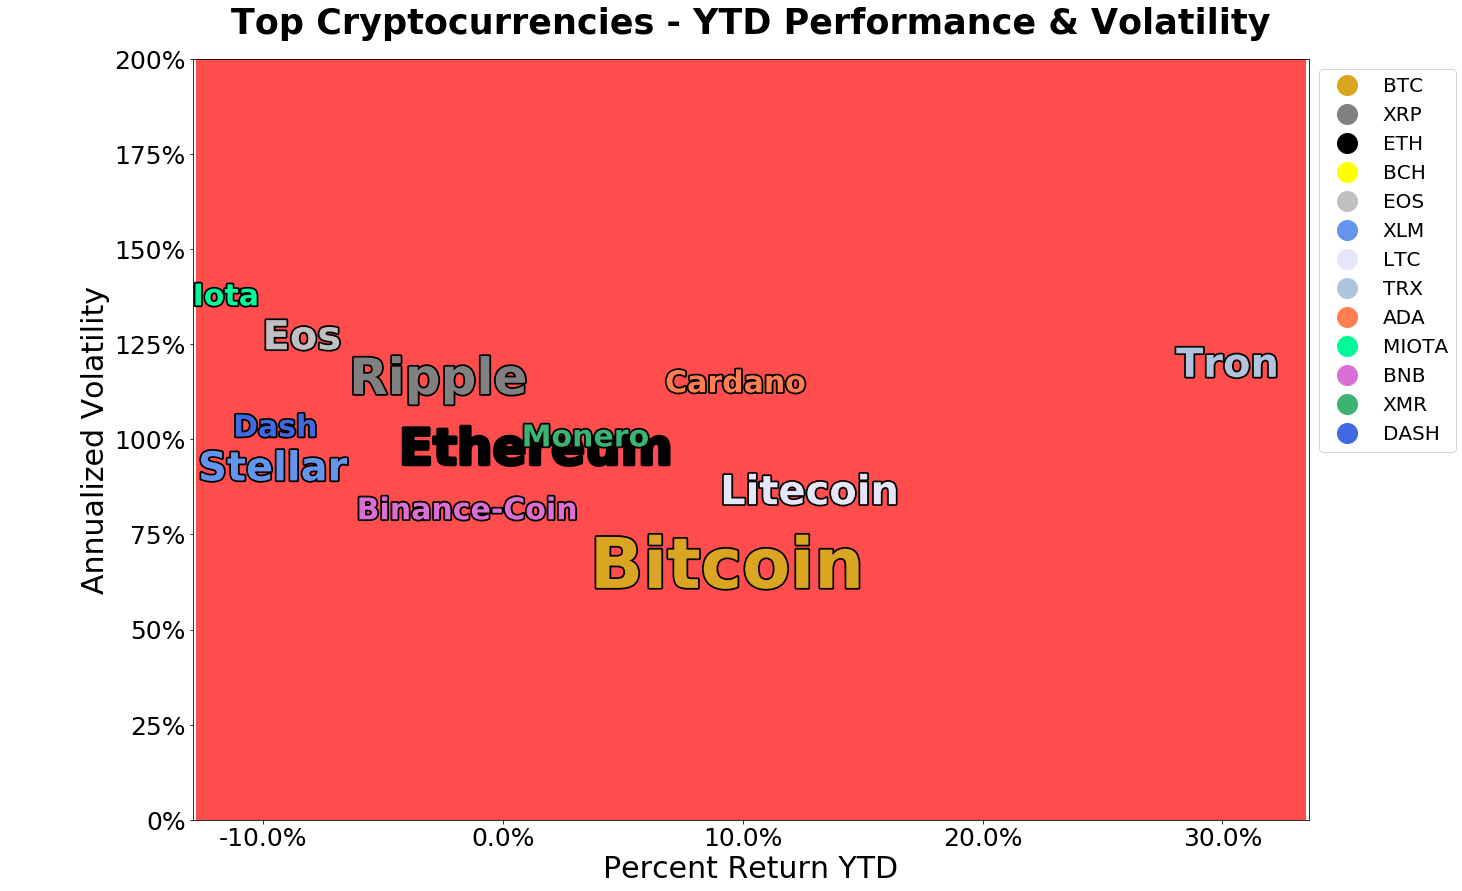

In [34]:
fig = plt.figure(figsize=(20,14))
ax = fig.add_subplot(1,1,1) 
font0 = FontProperties()
ax.margins(0)
ax.axvspan(min(ytd_dict.values()), max(ytd_dict.values()), facecolor='red', alpha=0.7)
plt.scatter(df_test.YTD, (df_test.Volatility), c='w', alpha=0.6);


font = font0.copy()
font.set_style('oblique')
font.set_weight('bold')
font.set_size('x-small')


text = [plt.annotate(row[0], (crypto_sorted.YTD[index]-1, crypto_sorted.Volatility[index]),
         fontsize=row[6],weight = 'semibold',
         path_effects=[pe.withStroke(linewidth=3.5, foreground="k")],
         color=row[7]) for index, row in crypto_sorted.iterrows()]


ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylim(0,200)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('Percent Return YTD', fontsize=30,weight = 'medium')
plt.ylabel('Annualized Volatility', fontsize=30,weight = 'medium')
plt.title('Top Cryptocurrencies - YTD Performance & Volatility', fontsize=35, pad=25,weight = 'semibold')

handles = [matplotlib.lines.Line2D([],[], marker="o", color=c, linestyle="none") for c in crypto_sorted.color.values]
# supply proxy artists to handles and last names to labels
lgnd=plt.legend(handles=handles, labels=list(crypto_sorted.Symbol.values),prop={'size':20},bbox_to_anchor=(1,1),ncol=1,
                 numpoints=1)
for l in lgnd.get_lines():
    l._legmarker.set_markersize(20)
adjust_text(text);
